In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
def run_null_model(num_trials, pre_id_sequences):
    repeat_counts = []
    for i in range(num_trials):
        print(f'Trial {i+1}')
        sequence_appearances = {}

        for sequence in pre_id_sequences.to_numpy():
            sequence = tuple(np.random.permutation(sequence))
            if sequence in sequence_appearances:
                sequence_appearances[sequence] += 1
            elif sequence[::-1] in sequence_appearances:
                sequence_appearances[sequence[::-1]] += 1
            else:
                sequence_appearances[sequence] = 1

        appearance_counts = np.array(list(sequence_appearances.values()))
        repeats = appearance_counts[appearance_counts > 1]
        total_repeats = np.sum(repeats)
        repeat_counts.append(total_repeats)
        
        print(f'Number of repeated sequences: {total_repeats}')
        print('------------------')
    print('Done')
    return repeat_counts

In [27]:
NUM_TRIALS = 1000
repeat_count_data = []

for k in tqdm(range(3,6+1)):
    # Import k-dependent data
    print(f'k = {k}')
    clusters = pd.read_csv(f'data/synapse_clusters/with_pre_ids/clusters_k{k}.csv', index_col=[0])
    print(clusters.shape)

    id_keys = [f'pre_pt_root_id_{m}' for m in range(k)]
    pre_id_sequences = clusters.loc[:, id_keys]

    # Run the null model
    repeat_count_data.append(run_null_model(NUM_TRIALS, pre_id_sequences))

print('All done!')

  0%|          | 0/4 [00:00<?, ?it/s]

k = 3
(110784, 12)
Trial 1
Number of repeated sequences: 12613
------------------
Trial 2
Number of repeated sequences: 12590
------------------
Trial 3
Number of repeated sequences: 12632
------------------
Trial 4
Number of repeated sequences: 12634
------------------
Trial 5
Number of repeated sequences: 12649
------------------
Trial 6
Number of repeated sequences: 12520
------------------
Trial 7
Number of repeated sequences: 12621
------------------
Trial 8
Number of repeated sequences: 12652
------------------
Trial 9
Number of repeated sequences: 12622
------------------
Trial 10
Number of repeated sequences: 12610
------------------
Trial 11
Number of repeated sequences: 12622
------------------
Trial 12
Number of repeated sequences: 12499
------------------
Trial 13
Number of repeated sequences: 12531
------------------
Trial 14
Number of repeated sequences: 12598
------------------
Trial 15
Number of repeated sequences: 12611
------------------
Trial 16
Number of repeated se

 25%|██▌       | 1/4 [12:26<37:20, 746.67s/it]

Number of repeated sequences: 12542
------------------
Done
k = 4
(88178, 14)
Trial 1
Number of repeated sequences: 5383
------------------
Trial 2
Number of repeated sequences: 5408
------------------
Trial 3
Number of repeated sequences: 5403
------------------
Trial 4
Number of repeated sequences: 5434
------------------
Trial 5
Number of repeated sequences: 5442
------------------
Trial 6
Number of repeated sequences: 5408
------------------
Trial 7
Number of repeated sequences: 5396
------------------
Trial 8
Number of repeated sequences: 5420
------------------
Trial 9
Number of repeated sequences: 5324
------------------
Trial 10
Number of repeated sequences: 5399
------------------
Trial 11
Number of repeated sequences: 5421
------------------
Trial 12
Number of repeated sequences: 5390
------------------
Trial 13
Number of repeated sequences: 5418
------------------
Trial 14
Number of repeated sequences: 5395
------------------
Trial 15
Number of repeated sequences: 5412
-----

 50%|█████     | 2/4 [20:00<19:08, 574.47s/it]

Number of repeated sequences: 5424
------------------
Done
k = 5
(74167, 16)
Trial 1
Number of repeated sequences: 2354
------------------
Trial 2
Number of repeated sequences: 2357
------------------
Trial 3
Number of repeated sequences: 2371
------------------
Trial 4
Number of repeated sequences: 2342
------------------
Trial 5
Number of repeated sequences: 2323
------------------
Trial 6
Number of repeated sequences: 2356
------------------
Trial 7
Number of repeated sequences: 2341
------------------
Trial 8
Number of repeated sequences: 2408
------------------
Trial 9
Number of repeated sequences: 2379
------------------
Trial 10
Number of repeated sequences: 2369
------------------
Trial 11
Number of repeated sequences: 2396
------------------
Trial 12
Number of repeated sequences: 2343
------------------
Trial 13
Number of repeated sequences: 2387
------------------
Trial 14
Number of repeated sequences: 2365
------------------
Trial 15
Number of repeated sequences: 2360
------

 75%|███████▌  | 3/4 [26:11<08:01, 481.48s/it]

Number of repeated sequences: 2367
------------------
Done
k = 6
(64330, 18)
Trial 1
Number of repeated sequences: 1025
------------------
Trial 2
Number of repeated sequences: 1013
------------------
Trial 3
Number of repeated sequences: 1004
------------------
Trial 4
Number of repeated sequences: 1013
------------------
Trial 5
Number of repeated sequences: 1005
------------------
Trial 6
Number of repeated sequences: 1017
------------------
Trial 7
Number of repeated sequences: 995
------------------
Trial 8
Number of repeated sequences: 1032
------------------
Trial 9
Number of repeated sequences: 1002
------------------
Trial 10
Number of repeated sequences: 1005
------------------
Trial 11
Number of repeated sequences: 1006
------------------
Trial 12
Number of repeated sequences: 1006
------------------
Trial 13
Number of repeated sequences: 1012
------------------
Trial 14
Number of repeated sequences: 992
------------------
Trial 15
Number of repeated sequences: 1020
--------

100%|██████████| 4/4 [31:39<00:00, 474.99s/it]

Number of repeated sequences: 985
------------------
Done
All done!


In [37]:
NUM_TRIALS = 2000
repeat_count_data = pd.read_pickle(f'data/null_model/unfiltered/repeat_data_{NUM_TRIALS}.pkl')

In [38]:
repeat_counts_stats = []
for l,repeat_counts in enumerate(repeat_count_data):
    print('k=',l+3)
    repeat_counts_df = pd.DataFrame(repeat_counts, columns=['repeat_count'])
    repeat_counts_stats.append(repeat_counts_df.describe())
    display(repeat_counts_df.describe())

k= 3


,repeat_count
count,2000.000000
mean,12598.657500
std,42.377366
min,12449.000000
25%,12570.000000
50%,12598.000000
75%,12627.000000
max,12737.000000


k= 4


,repeat_count
count,2000.000000
mean,5400.255000
std,32.387582
min,5259.000000
25%,5378.750000
50%,5401.000000
75%,5422.000000
max,5518.000000


k= 5


,repeat_count
count,2000.000000
mean,2365.980000
std,22.895583
min,2285.000000
25%,2351.000000
50%,2365.000000
75%,2381.000000
max,2445.000000


k= 6


,repeat_count
count,2000.000000
mean,1012.262000
std,14.364488
min,968.000000
25%,1002.000000
50%,1012.000000
75%,1022.000000
max,1059.000000


In [39]:
# Actual sequence repeat data:
actual_repeat_counts = [12597,5381,2471,1104]

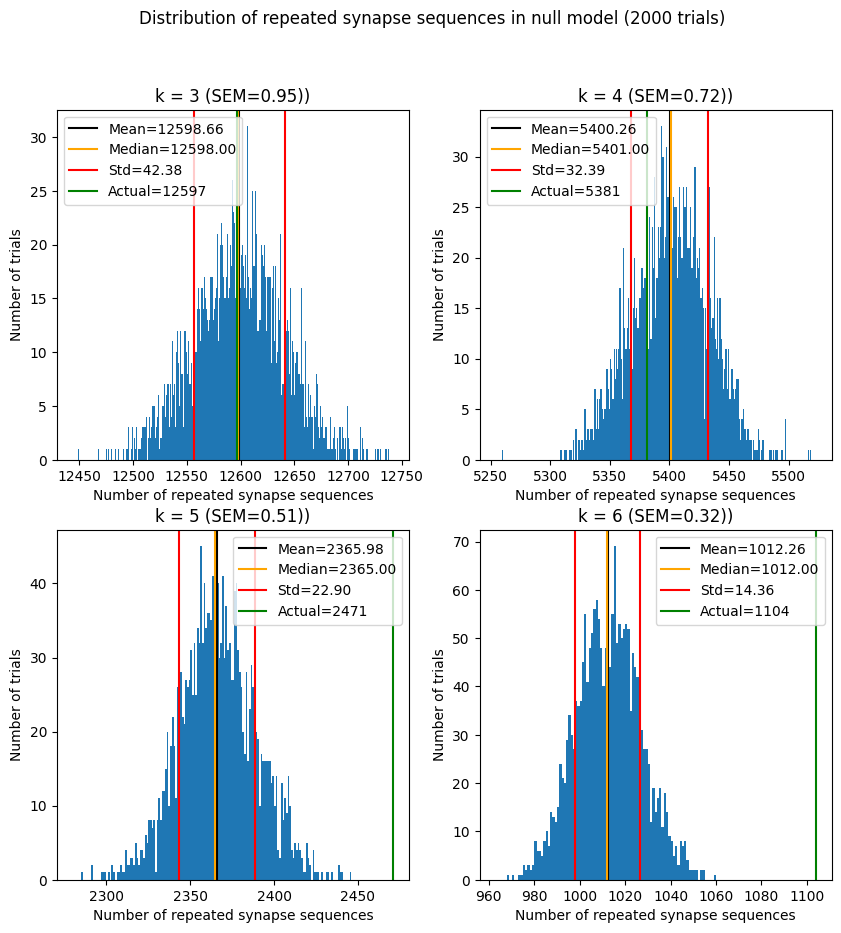

In [40]:
# Plot the distribution of repeat counts
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.flatten()
for l,repeat_counts in enumerate(repeat_count_data):
    counts_mean = repeat_counts_stats[l].loc['mean', 'repeat_count']
    counts_median = repeat_counts_stats[l].loc['50%', 'repeat_count']
    counts_std = repeat_counts_stats[l].loc['std', 'repeat_count']
    counts_sem = counts_std / np.sqrt(NUM_TRIALS)

    axs[l].hist(repeat_counts, bins=range(min(repeat_counts) - 5, max(repeat_counts)+5+1))
    axs[l].axvline(counts_mean, color='black', label=f'Mean={counts_mean:.2f}')
    axs[l].axvline(counts_median, color='orange', label=f'Median={counts_median:.2f}')
    axs[l].axvline(counts_mean + counts_std, color='red', label=f'Std={counts_std:.2f}')
    axs[l].axvline(counts_mean - counts_std, color='red')

    axs[l].axvline(actual_repeat_counts[l], color='green', label=f'Actual={actual_repeat_counts[l]}')
    
    axs[l].set_xlabel('Number of repeated synapse sequences')
    axs[l].set_ylabel('Number of trials')
    axs[l].set_title(f'k = {l+3} (SEM={counts_sem:.2f}))')
    axs[l].legend()
fig.suptitle(f'Distribution of repeated synapse sequences in null model ({NUM_TRIALS} trials)')
plt.show()

In [41]:
# Question for Saarthak: Do we want to count every instance of a sequence that repeats, or just the first instance? I think the former

In [42]:
# pd.to_pickle(repeat_count_data, f'data/null_model/repeat_data_{NUM_TRIALS}_0.pkl')